### Credit Score Fraud Detection Study

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn 

#### Loading the dataset

In [2]:
# Read the tab-separated file into a DataFrame
file_path = r'fraud_detection_dataset.csv'
df_0 = pd.read_csv(file_path)

In [3]:
df_0

,account_open_date,age,location,occupation,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,...,number_of_delinquent_accounts,number_of_defaulted_accounts,earliest_credit_account,recent_trade_activity,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
0,11/9/2023,56,Los Angeles,Teacher,40099,424.0,108,True,10,3.139572,...,4.0,2,9/11/2018,3/7/2024,3,True,True,False,False,True
1,9/11/2022,69,New York,Engineer,2050,483.0,0,False,1,1.017489,...,3.0,2,3/8/2023,1/28/2024,3,False,True,False,False,False
2,7/12/2020,46,Miami,Engineer,71936,566.0,0,False,1,1.508626,...,2.0,0,4/26/2024,10/3/2024,2,False,False,False,False,False
3,8/13/2024,32,Houston,Banker,15833,NaN,97,True,5,2.995150,...,3.0,1,9/14/2023,10/14/2024,4,False,True,True,False,False
4,7/27/2024,60,Houston,Lawyer,8574,787.0,0,False,1,1.182380,...,NaN,0,11/8/2022,9/2/2024,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,4/10/2021,33,Boston,Consultant,14566,589.0,92,True,2,1.727134,...,3.0,2,11/29/2017,8/24/2024,1,True,True,True,False,False
6996,3/18/2022,66,Atlanta,Banker,8930,679.0,0,True,1,1.430593,...,0.0,0,3/20/2020,9/12/2024,0,False,False,True,False,False
6997,6/20/2024,68,Houston,Other,4501,321.0,58,True,1,1.750392,...,4.0,2,8/7/2015,2/11/2024,4,False,True,False,False,False
6998,10/4/2020,35,Chicago,Retail Worker,11938,729.0,0,False,1,1.518169,...,0.0,0,7/4/2019,4/17/2024,0,False,False,False,False,False


In [4]:
df_0.columns

Index(['account_open_date', 'age', 'location', 'occupation', 'income_level',
       'fico_score', 'delinquency_status', 'charge_off_status',
       'number_of_credit_applications', 'debt_to_income_ratio',
       'payment_methods_high_risk', 'max_balance', 'avg_balance_last_12months',
       'number_of_delinquent_accounts', 'number_of_defaulted_accounts',
       'earliest_credit_account', 'recent_trade_activity',
       'new_accounts_opened_last_12months',
       'multiple_applications_short_time_period', 'unusual_submission_pattern',
       'applications_submitted_during_odd_hours', 'watchlist_blacklist_flag',
       'public_records_flag'],
      dtype='object')

In [5]:
df_0[['account_open_date',
       'earliest_credit_account', 'recent_trade_activity','charge_off_status']]

,account_open_date,earliest_credit_account,recent_trade_activity,charge_off_status
0,11/9/2023,9/11/2018,3/7/2024,True
1,9/11/2022,3/8/2023,1/28/2024,False
2,7/12/2020,4/26/2024,10/3/2024,False
3,8/13/2024,9/14/2023,10/14/2024,True
4,7/27/2024,11/8/2022,9/2/2024,False
...,...,...,...,...
6995,4/10/2021,11/29/2017,8/24/2024,True
6996,3/18/2022,3/20/2020,9/12/2024,True
6997,6/20/2024,8/7/2015,2/11/2024,True
6998,10/4/2020,7/4/2019,4/17/2024,False


In [6]:
#Creating seperate dataframes for the account open date(year-wise)

df_0['account_open_date'] = pd.to_datetime(df_0['account_open_date'])

df_0['account_open_date'].dt.year.unique() ##array([2023, 2022, 2020, 2024, 2021, 2019], dtype=int64)

df_0_2023 = df_0[df_0['account_open_date'].dt.year == 2023]
df_0_2022 = df_0[df_0['account_open_date'].dt.year == 2022]
df_0_2020 = df_0[df_0['account_open_date'].dt.year == 2022]
df_0_2024 = df_0[df_0['account_open_date'].dt.year == 2024]
df_0_2021 = df_0[df_0['account_open_date'].dt.year == 2021]
df_0_2019 = df_0[df_0['account_open_date'].dt.year == 2019]





# Descriptive Analysis

## Univariate Analysis filtered by the account open year

### Charge off status

In [7]:
def plot_charge_off_status_by_year(df_year, year, column_name='charge_off_status'):
    status_counts = df_year[column_name].value_counts()
    status_proportions = status_counts / len(df_year) * 100
    
    labels = status_counts.index
    sizes = status_counts.values
    
    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140
    )
    plt.title(f'Charge Off Status Distribution for Accounts Opened in Year {year}')
    plt.show()

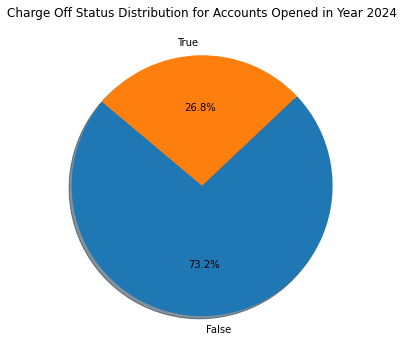

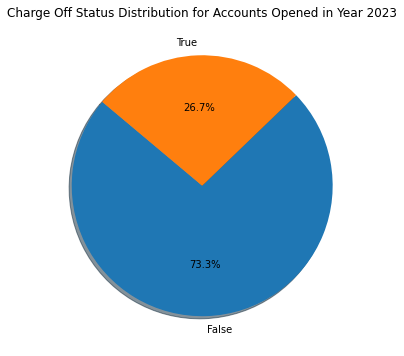

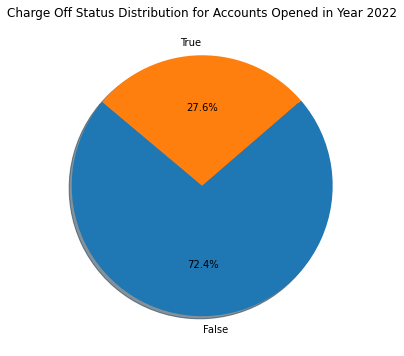

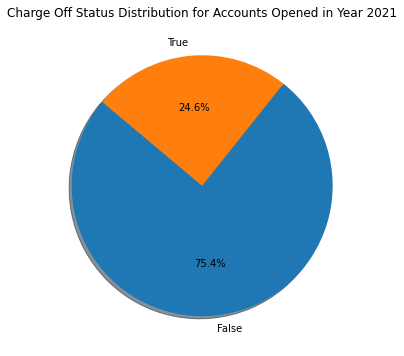

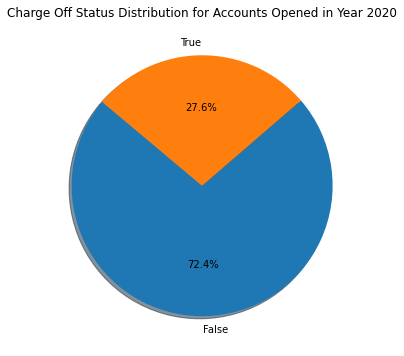

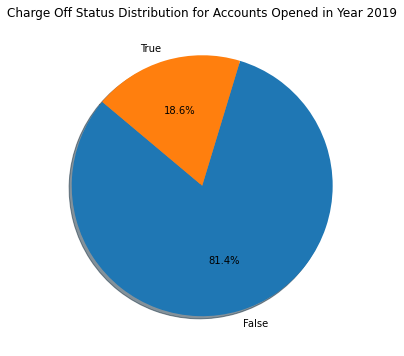

In [8]:
#Charge Off Status Distribution for Accounts Opened in Year 2024
plot_charge_off_status_by_year(df_0_2024, 2024, column_name='charge_off_status')

#Charge Off Status Distribution for Accounts Opened in Year 2023
plot_charge_off_status_by_year(df_0_2023, 2023, column_name='charge_off_status')
2021, 2019

#Charge Off Status Distribution for Accounts Opened in Year 2022
plot_charge_off_status_by_year(df_0_2022, 2022, column_name='charge_off_status')

#Charge Off Status Distribution for Accounts Opened in Year 2021
plot_charge_off_status_by_year(df_0_2021, 2021, column_name='charge_off_status')

#Charge Off Status Distribution for Accounts Opened in Year 2020
plot_charge_off_status_by_year(df_0_2020, 2020, column_name='charge_off_status')

#Charge Off Status Distribution for Accounts Opened in Year 2019
plot_charge_off_status_by_year(df_0_2019, 2019, column_name='charge_off_status')



###  FICO SCORES


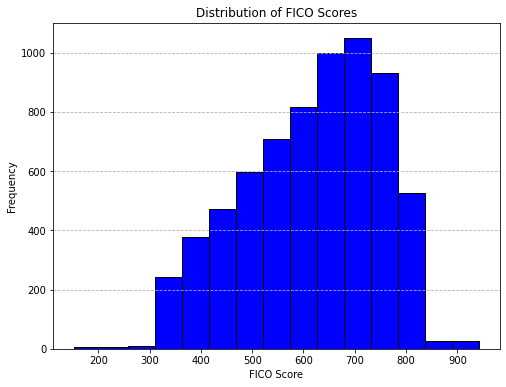

In [9]:
#Overall
plt.figure(figsize=(8, 6))
plt.hist(
    df_0['fico_score'], 
    bins=15, 
    color='blue', 
    edgecolor='black')
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [10]:
def plot_fico_score_by_year(df_year, year):
    plt.figure(figsize=(8, 6))
    plt.hist(
        df_year['fico_score'], 
        bins=15, 
        color='blue', 
        edgecolor='black')
    plt.xlabel('FICO Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')
    plt.title(f'Distribution of Fico Scores for Accounts Opened in Year {year}')
    plt.show()

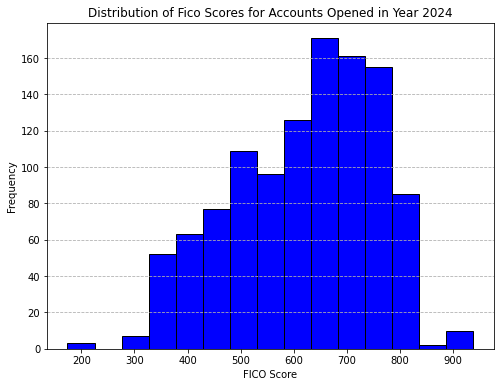

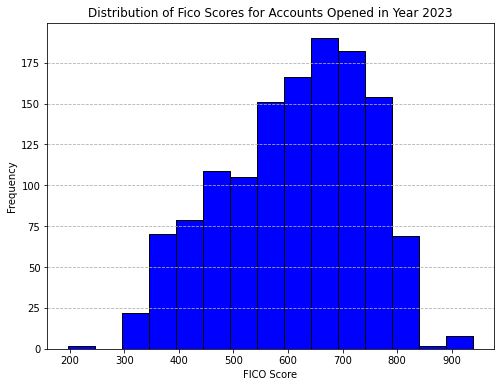

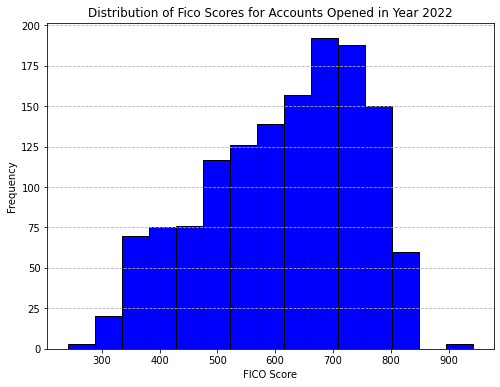

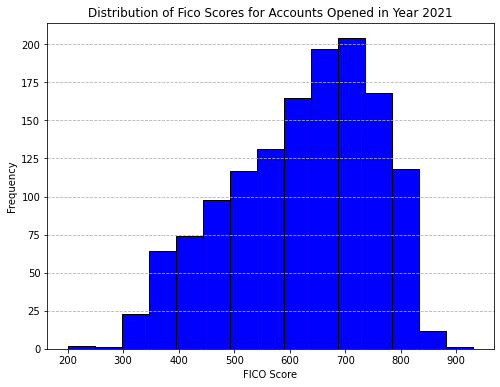

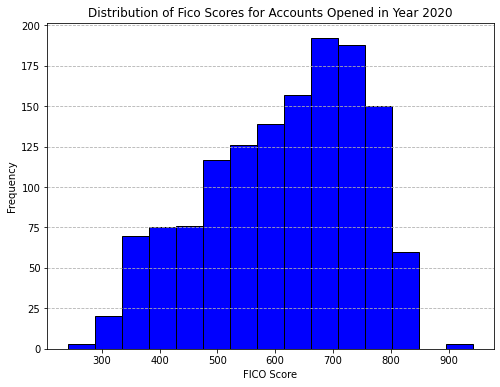

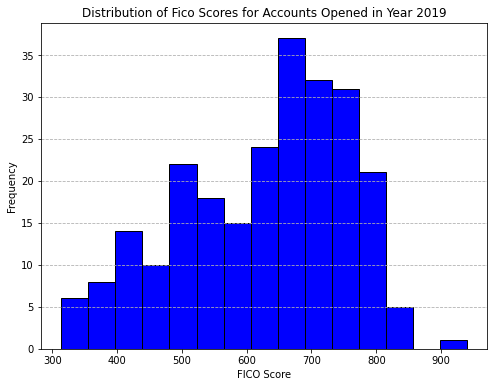

In [11]:
#Fico Scores for Accounts Opened (Year Wise)
plot_fico_score_by_year(df_0_2024, 2024)
plot_fico_score_by_year(df_0_2023, 2023)
plot_fico_score_by_year(df_0_2022, 2022)
plot_fico_score_by_year(df_0_2021, 2021)
plot_fico_score_by_year(df_0_2020, 2020)
plot_fico_score_by_year(df_0_2019, 2019)



### Occupation

In [12]:
def plot_occupation_by_year(df_year, year, column_name='occupation'):
    status_counts = df_year[column_name].value_counts()
    status_proportions = status_counts / len(df_year) * 100
    
    labels = status_counts.index
    sizes = status_counts.values
    
    plt.figure(figsize=(18, 6))
    plt.bar(labels, sizes, width=0.8, bottom=None, align='center', data=df_year)
    plt.title(f'Distribution of Occupations of people who opened accounts in Year {year}')
    plt.show()

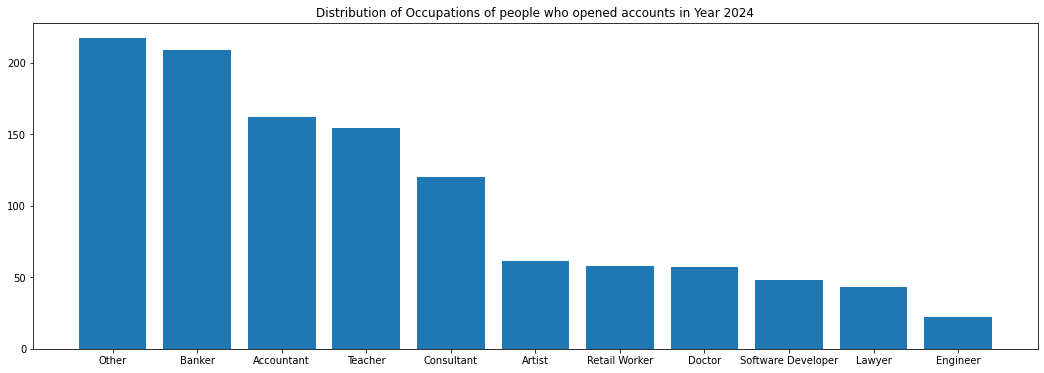

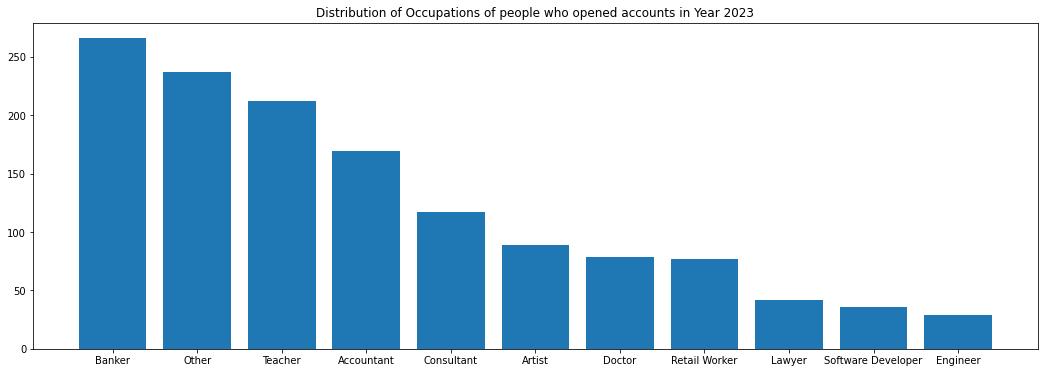

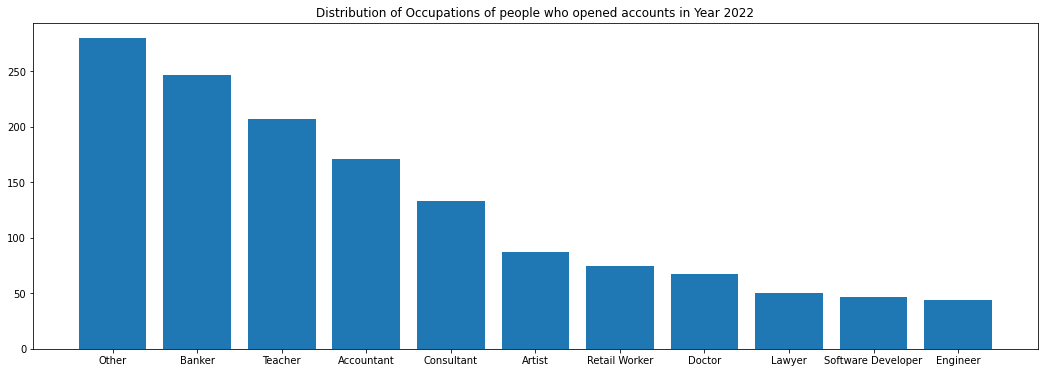

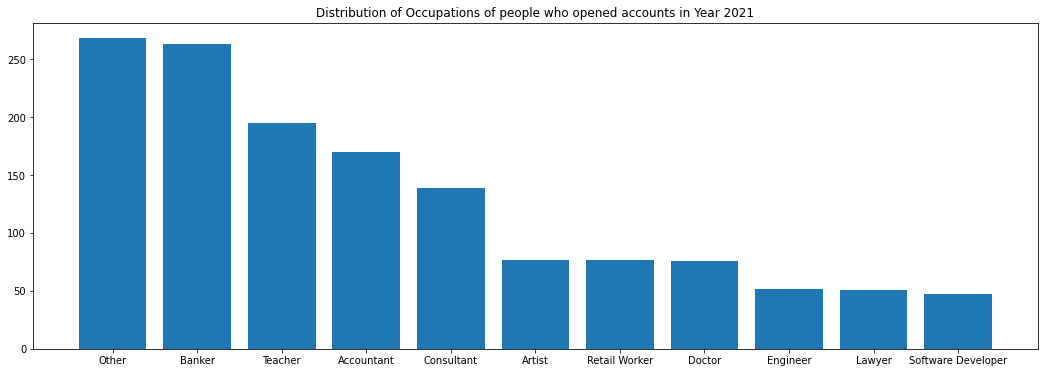

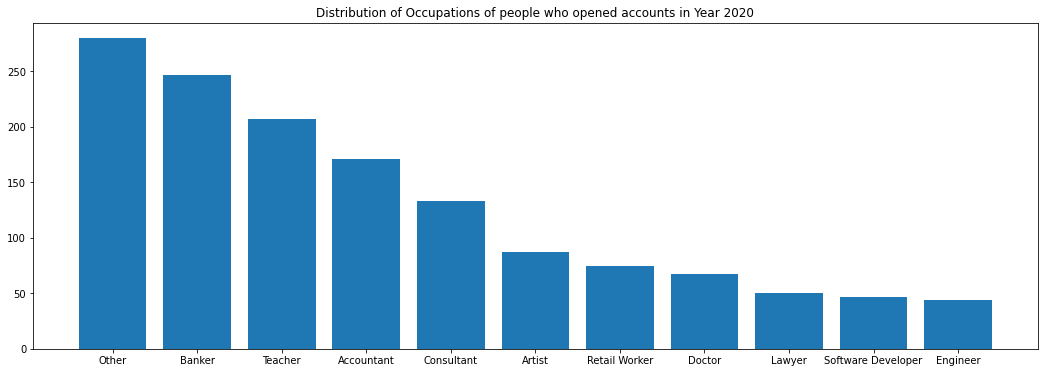

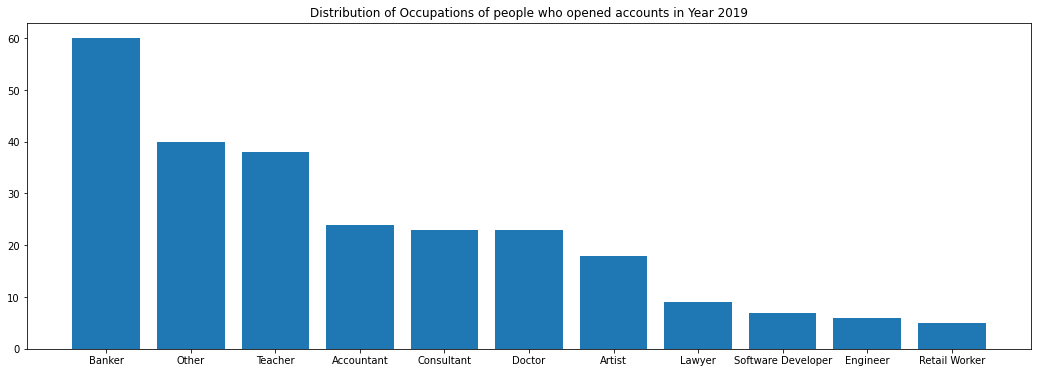

In [13]:
#Fico Scores for Accounts Opened (Year Wise)
plot_occupation_by_year(df_0_2024, 2024)
plot_occupation_by_year(df_0_2023, 2023)
plot_occupation_by_year(df_0_2022, 2022)
plot_occupation_by_year(df_0_2021, 2021)
plot_occupation_by_year(df_0_2020, 2020)
plot_occupation_by_year(df_0_2019, 2019)



###  Income_level

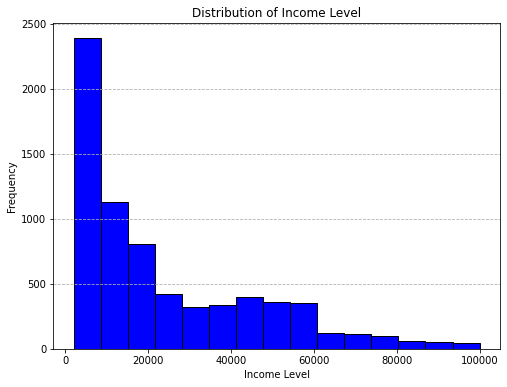

In [14]:
#Overall
plt.figure(figsize=(8, 6))
plt.hist(
    df_0['income_level'], 
    bins=15, 
    color='blue', 
    edgecolor='black')
plt.title('Distribution of Income Level')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [15]:
def plot_income_level_by_year(df_year, year):
    plt.figure(figsize=(8, 6))
    plt.hist(
        df_year['income_level'], 
        bins=15, 
        color='blue', 
        edgecolor='black')
    plt.xlabel('Income Level')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')
    plt.title(f'Distribution of Income Level of account openers in Year {year}')
    plt.show()

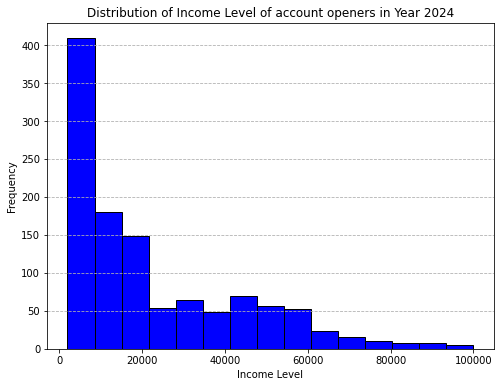

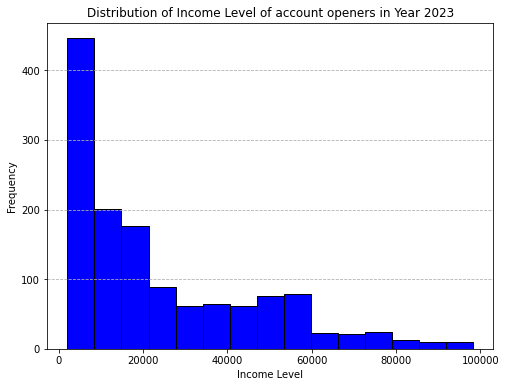

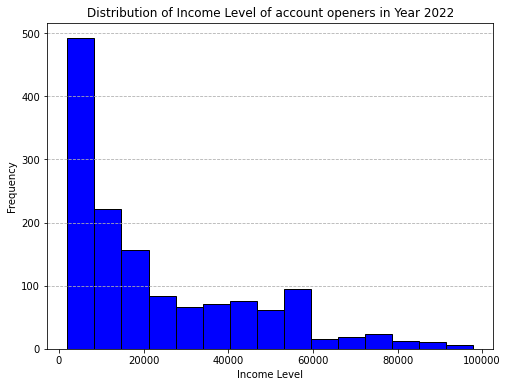

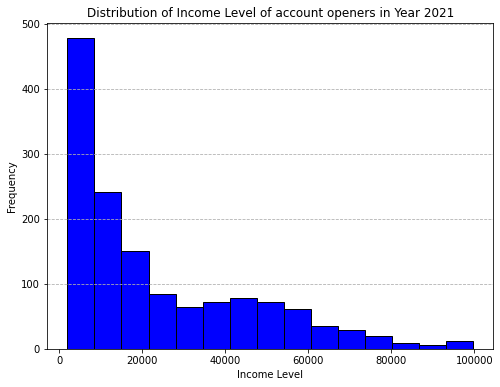

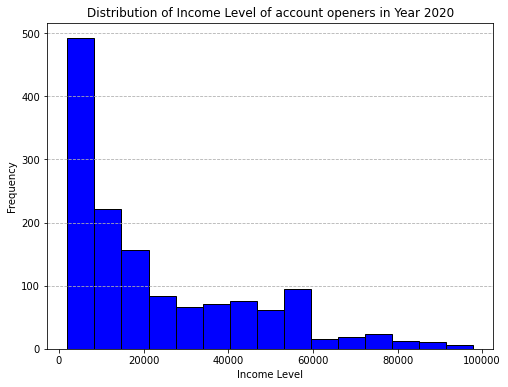

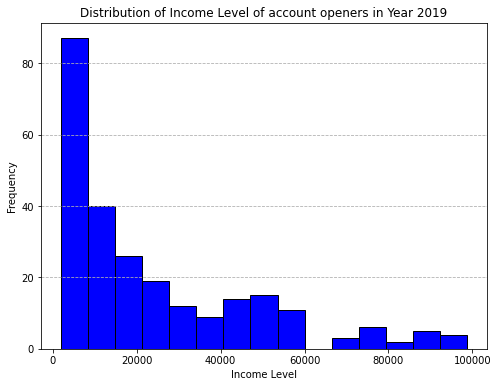

In [16]:
#Fico Scores for Accounts Opened (Year Wise)
plot_income_level_by_year(df_0_2024, 2024)
plot_income_level_by_year(df_0_2023, 2023)
plot_income_level_by_year(df_0_2022, 2022)
plot_income_level_by_year(df_0_2021, 2021)
plot_income_level_by_year(df_0_2020, 2020)
plot_income_level_by_year(df_0_2019, 2019)



### Location

In [17]:
def plot_location_by_year(df_year, year, column_name='location'):
    status_counts = df_year[column_name].value_counts()
    status_proportions = status_counts / len(df_year) * 100
    
    labels = status_counts.index
    sizes = status_counts.values
    
    plt.figure(figsize=(18, 6))
    plt.bar(labels, sizes, width=0.8, bottom=None, align='center', data=df_year)
    plt.title(f'Distribution of Account open branch locations in Year {year}')
    plt.show()

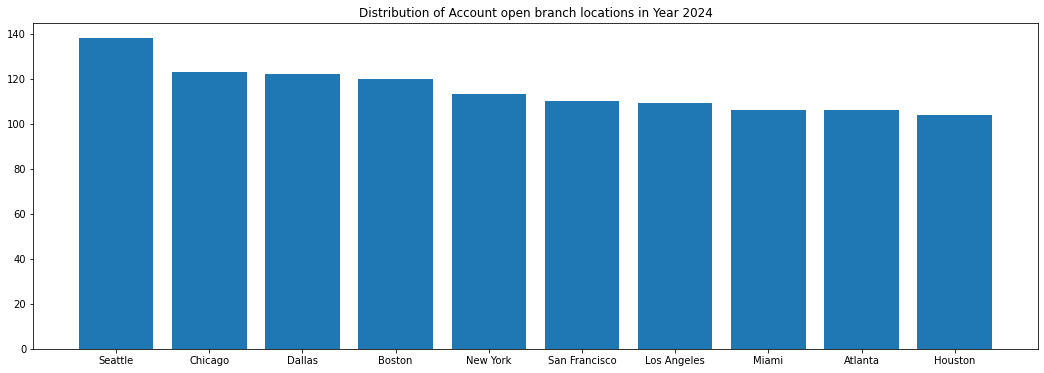

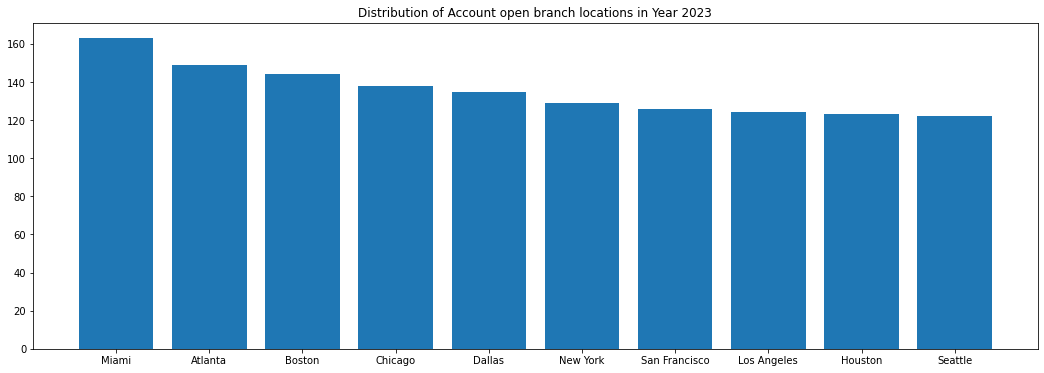

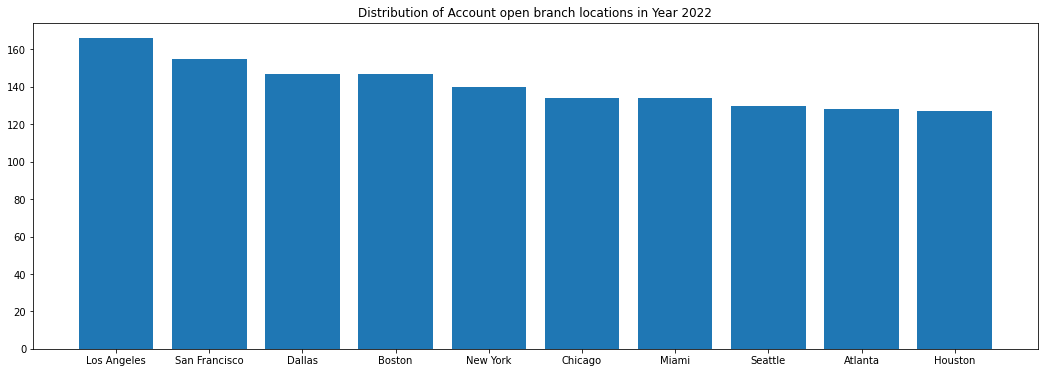

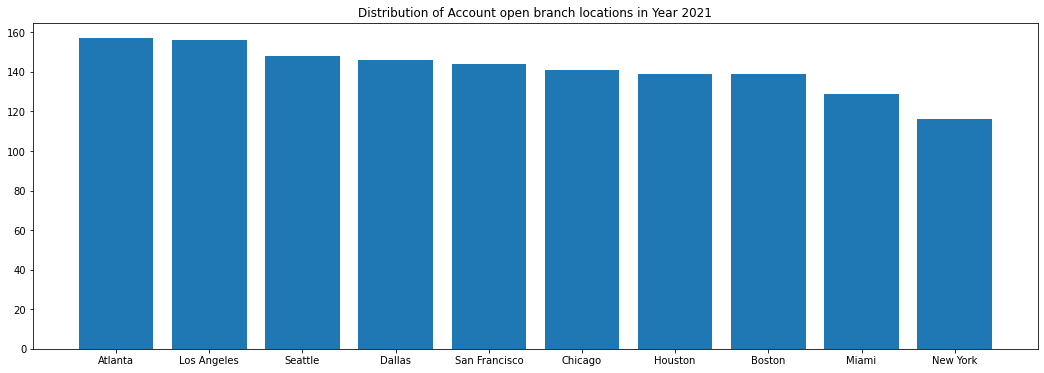

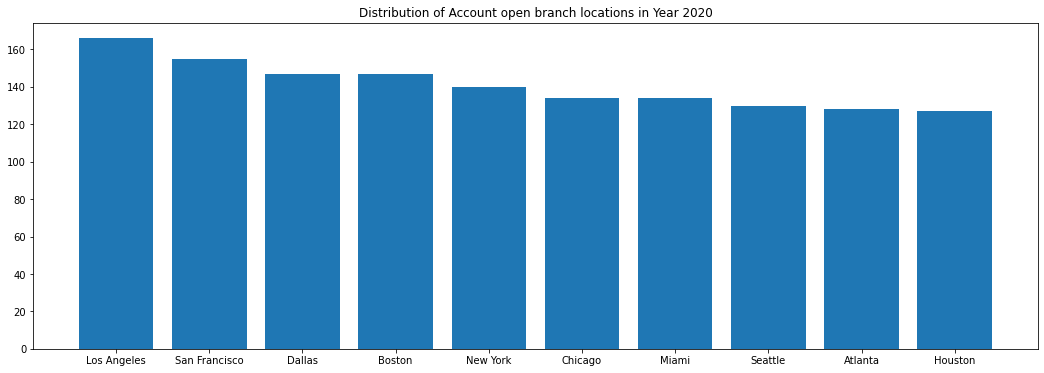

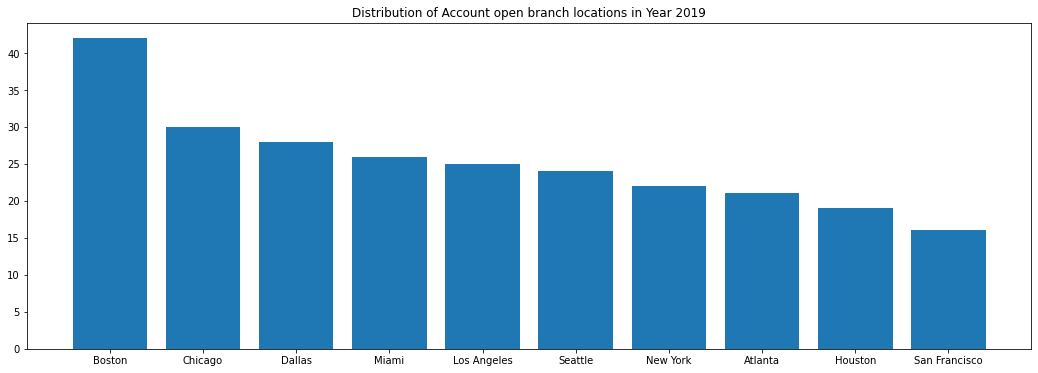

In [18]:
#Fico Scores for Accounts Opened (Year Wise)
plot_location_by_year(df_0_2024, 2024)
plot_location_by_year(df_0_2023, 2023)
plot_location_by_year(df_0_2022, 2022)
plot_location_by_year(df_0_2021, 2021)
plot_location_by_year(df_0_2020, 2020)
plot_location_by_year(df_0_2019, 2019)



## Earliest Credit Year

<Figure size 720x432 with 0 Axes>

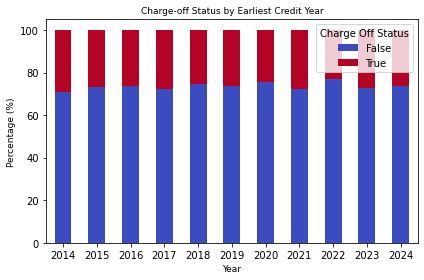

In [19]:
df_0['earliest_credit_account'] = pd.to_datetime(df_0['earliest_credit_account'])

# Group data by year and charge_off_status
df_0['year_eca'] = df_0['earliest_credit_account'].dt.year
agg_data = df_0.groupby(['year_eca', 'charge_off_status']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = agg_data.pivot(index='year_eca', columns='charge_off_status', values='count').fillna(0)
pivot_data.columns = ['False', 'True']  # Rename columns for clarity

# Calculate percentages
pivot_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plotting the percentage stacked bar chart
plt.figure(figsize=(10, 6))
pivot_percentage.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

# Add labels and title
plt.title('Charge-off Status by Earliest Credit Year', fontsize=9)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Percentage (%)', fontsize=9)
plt.xticks(rotation=0)
plt.legend(title='Charge Off Status', labels=['False', 'True'])
plt.tight_layout()
plt.show()

## Recent Trade Activity Year

<Figure size 720x432 with 0 Axes>

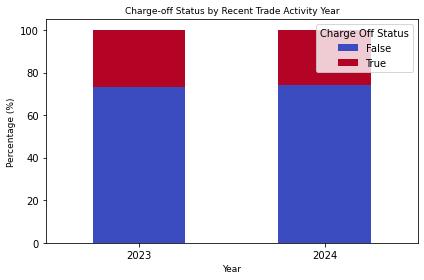

In [20]:
df_0['recent_trade_activity'] = pd.to_datetime(df_0['recent_trade_activity'])

# Group data by year and charge_off_status
df_0['year_rta'] = df_0['recent_trade_activity'].dt.year
agg_data = df_0.groupby(['year_rta', 'charge_off_status']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = agg_data.pivot(index='year_rta', columns='charge_off_status', values='count').fillna(0)
pivot_data.columns = ['False', 'True']  # Rename columns for clarity

# Calculate percentages
pivot_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plotting the percentage stacked bar chart
plt.figure(figsize=(10, 6))
pivot_percentage.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

# Add labels and title
plt.title('Charge-off Status by Recent Trade Activity Year', fontsize=9)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Percentage (%)', fontsize=9)
plt.xticks(rotation=0)
plt.legend(title='Charge Off Status', labels=['False', 'True'])
plt.tight_layout()
plt.show()

## Location

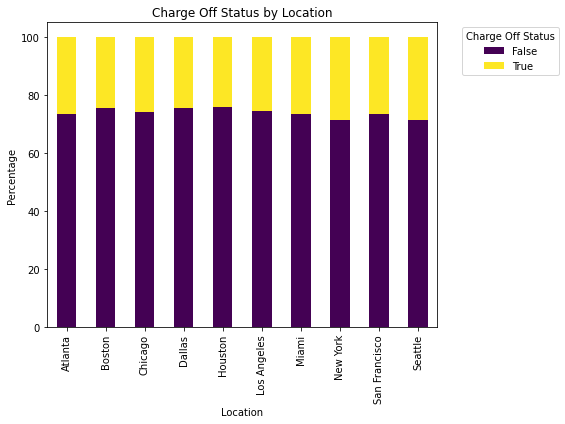

In [21]:
cross_tab = pd.crosstab(df_0['location'], df_0['charge_off_status'])

#percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

plt.title('Charge Off Status by Location')
plt.ylabel('Percentage')
plt.xlabel('Location')
plt.legend(title='Charge Off Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Occupation

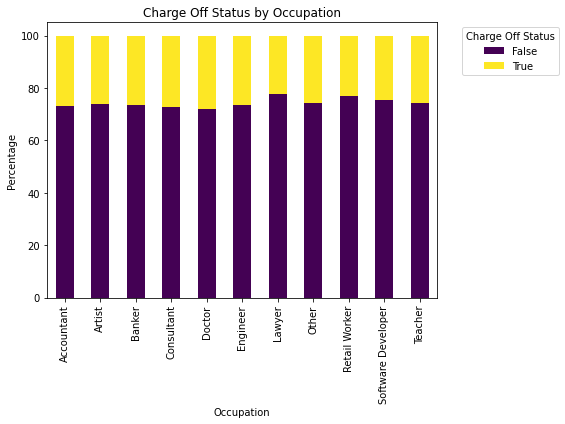

In [22]:
cross_tab = pd.crosstab(df_0['occupation'], df_0['charge_off_status'])

#percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

plt.title('Charge Off Status by Occupation')
plt.ylabel('Percentage')
plt.xlabel('Occupation')
plt.legend(title='Charge Off Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# Boolean Variables

## Public records flag

In [23]:
cross_tab = pd.crosstab(df_0['public_records_flag'], df_0['charge_off_status'])
cross_tab


charge_off_status,False,True
public_records_flag,,
False,4257,1330
True,916,497


In [24]:
#percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent

charge_off_status,False,True
public_records_flag,,
False,76.194738,23.805262
True,64.826610,35.173390


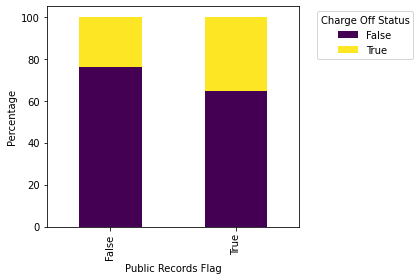

In [25]:
#plot
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')

plt.ylabel('Percentage')
plt.xlabel('Public Records Flag')
plt.legend(title='Charge Off Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Watchlist blacklist flag

In [26]:
cross_tab = pd.crosstab(df_0['watchlist_blacklist_flag'], df_0['charge_off_status'])
cross_tab

charge_off_status,False,True
watchlist_blacklist_flag,,
False,4558,1562
True,615,265


In [27]:
#percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent

charge_off_status,False,True
watchlist_blacklist_flag,,
False,74.477124,25.522876
True,69.886364,30.113636


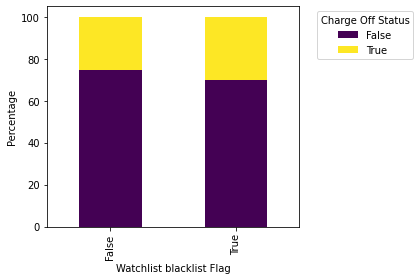

In [28]:
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')

plt.ylabel('Percentage')
plt.xlabel('Watchlist blacklist Flag')
plt.legend(title='Charge Off Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Applications submitted during odd hours

In [29]:
cross_tab = pd.crosstab(df_0['applications_submitted_during_odd_hours'], df_0['charge_off_status'])
cross_tab

charge_off_status,False,True
applications_submitted_during_odd_hours,,
False,3872,928
True,1301,899


In [30]:
#percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent

charge_off_status,False,True
applications_submitted_during_odd_hours,,
False,80.666667,19.333333
True,59.136364,40.863636


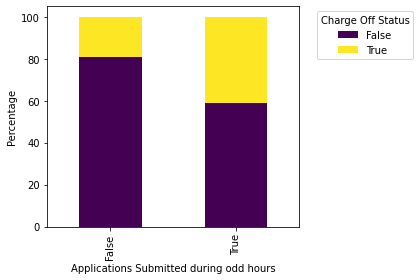

In [31]:
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')

plt.ylabel('Percentage')
plt.xlabel('Applications Submitted during odd hours')
plt.legend(title='Charge Off Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Unusual submission pattern

In [32]:
cross_tab = pd.crosstab(df_0['unusual_submission_pattern'], df_0['charge_off_status'])
cross_tab

charge_off_status,False,True
unusual_submission_pattern,,
False,4046,776
True,440,828


In [33]:
#percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent

charge_off_status,False,True
unusual_submission_pattern,,
False,83.907092,16.092908
True,34.700315,65.299685


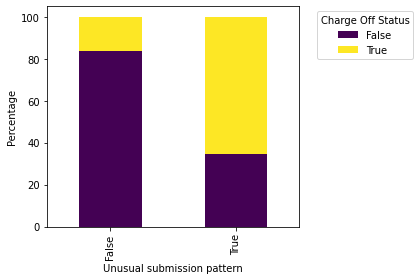

In [34]:
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')

plt.ylabel('Percentage')
plt.xlabel('Unusual submission pattern')
plt.legend(title='Charge Off Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Multiple applications short time period

In [35]:
cross_tab = pd.crosstab(df_0['multiple_applications_short_time_period'], df_0['charge_off_status'])
cross_tab

charge_off_status,False,True
multiple_applications_short_time_period,,
False,4243,944
True,930,883


In [36]:
#percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent

charge_off_status,False,True
multiple_applications_short_time_period,,
False,81.800655,18.199345
True,51.296194,48.703806


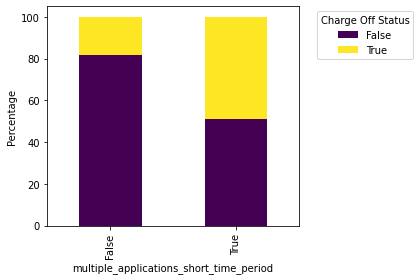

In [37]:
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')

plt.ylabel('Percentage')
plt.xlabel('multiple_applications_short_time_period')
plt.legend(title='Charge Off Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Bivariate Analysis

In [52]:
import pandas as pd

numerical_data = df_0.select_dtypes(include=['int64', 'float64'])

print("Numerical Variables:")
print(numerical_data.columns)

numerical_df = df_0[numerical_data.columns]

numerical_df

Numerical Variables:
Index(['age', 'income_level', 'fico_score', 'delinquency_status',
       'number_of_credit_applications', 'debt_to_income_ratio', 'max_balance',
       'avg_balance_last_12months', 'number_of_delinquent_accounts',
       'number_of_defaulted_accounts', 'new_accounts_opened_last_12months',
       'year_eca', 'year_rta'],
      dtype='object')


,age,income_level,fico_score,delinquency_status,number_of_credit_applications,debt_to_income_ratio,max_balance,avg_balance_last_12months,number_of_delinquent_accounts,number_of_defaulted_accounts,new_accounts_opened_last_12months,year_eca,year_rta
0,56,40099,424.0,108,10,3.139572,18209.383136,4324.930673,4.0,2,3,2018,2024
1,69,2050,483.0,0,1,1.017489,33673.696504,21726.593916,3.0,2,3,2023,2024
2,46,71936,566.0,0,1,1.508626,101918.174202,63930.102255,2.0,0,2,2024,2024
3,32,15833,NaN,97,5,2.995150,9055.101659,3033.403742,3.0,1,4,2023,2024
4,60,8574,787.0,0,1,1.182380,91682.852040,77457.387016,NaN,0,0,2022,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,33,14566,589.0,92,2,1.727134,30130.335338,NaN,3.0,2,1,2017,2024
6996,66,8930,679.0,0,1,1.430593,60003.573958,46216.414627,0.0,0,0,2020,2024
6997,68,4501,321.0,58,1,1.750392,68429.493890,40311.144520,4.0,2,4,2015,2024
6998,35,11938,729.0,0,1,1.518169,39358.621496,25699.779360,0.0,0,0,2019,2024


In [50]:
# Identify categorical variables
categorical_data = df_0.select_dtypes(include=['object', 'category', 'bool'])

# Display the categorical columns
print("Categorical Variables:")
print(categorical_data.columns)

# Create a new DataFrame with only categorical variables
categorical_df = df_0[categorical_data.columns]

# Display the first few rows of the categorical DataFrame
print(categorical_df.head())


Categorical Variables:
Index(['location', 'occupation', 'charge_off_status',
       'payment_methods_high_risk', 'multiple_applications_short_time_period',
       'unusual_submission_pattern', 'applications_submitted_during_odd_hours',
       'watchlist_blacklist_flag', 'public_records_flag'],
      dtype='object')
      location occupation  charge_off_status  payment_methods_high_risk  \
0  Los Angeles    Teacher               True                      False   
1     New York   Engineer              False                      False   
2        Miami   Engineer              False                      False   
3      Houston     Banker               True                      False   
4      Houston     Lawyer              False                      False   

   multiple_applications_short_time_period unusual_submission_pattern  \
0                                     True                       True   
1                                    False                       True   
2            

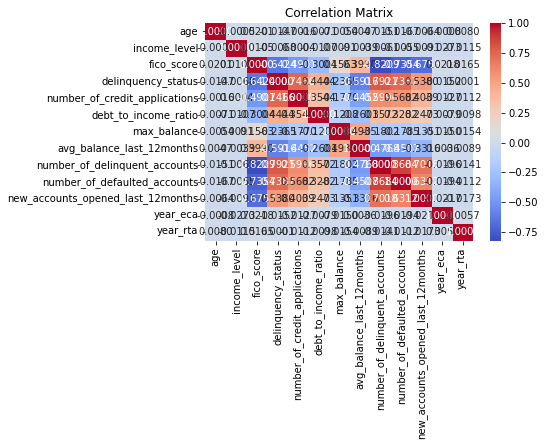

In [ ]:
#Correlation matrix for numerical variables
import seaborn as sns
corr_matrix = numerical_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Correlation Matrix")
plt.show()



